### Importing the Dependencies

In [225]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection and Analysis

In [226]:
# Loading the dataset to a pandas dataframe
heart_disease_dataset = pd.read_csv('datasets/heart_disease.csv')

In [227]:
heart_disease_dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [228]:
heart_disease_dataset.shape

(1190, 12)

In [229]:
heart_disease_dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [230]:
heart_disease_dataset.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [231]:
# Checking for missing values
heart_disease_dataset.isnull().sum()


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [232]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**Dataset Description:**

- **Age**: Age of the individual in years.

- **Sex**: Gender of the individual (1 = male, 0 = female).

- **Cp**: Chest pain type (categorical variable indicating the type of chest pain).

- **Trestbps**: Resting blood pressure (in mm Hg) upon admission to the hospital.

- **Chol**: Serum cholesterol level (in mg/dl).

- **Fbs**: Fasting blood sugar level (1 = true if fasting blood sugar > 120 mg/dl, 0 = false if fasting blood sugar ≤ 120 mg/dl).

- **Restecg**: Resting electrocardiographic results (categorical variable indicating electrocardiogram data).

- **Thalach**: Maximum heart rate achieved during exercise.

- **Exang**: Exercise-induced angina (1 = yes, 0 = no).

- **Oldpeak**: ST depression induced by exercise relative to rest (a measure of ST segment depression).

- **Target**: Presence of heart disease (1 = Heart Disease, 0 = Normal).

In [233]:
heart_disease_dataset['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [234]:
heart_disease_dataset.groupby('target').mean()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
target,,,,,,,,,,,
0,51.124777,0.623886,2.777184,129.793226,231.657754,0.119430,0.631016,150.894831,0.139037,0.464706,1.297683
1,56.034976,0.888712,3.639110,134.259141,191.372019,0.297297,0.758347,129.777424,0.608903,1.331320,1.915739


In [235]:
# for col in (heart_disease_dataset.iloc[:,:-1].columns):
#     if(heart_disease_dataset[col].min()==heart_disease_dataset[col].max()):
#             heart_disease_dataset.drop(col, axis=1, inplace=True)

In [236]:
# Separating the data and labels
X = heart_disease_dataset.drop(columns=['target'], axis=1)
y = heart_disease_dataset['target']

In [237]:
X.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [238]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

### Data Standardization

In [239]:
# scalar = StandardScaler()

In [240]:
# scalar.fit(X)

In [241]:
# standardized_data = scalar.transform(X)

In [242]:
# standardized_data

In [243]:
# X = standardized_data
y = heart_disease_dataset['target']

### Train Test Split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [245]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [246]:
print(X.shape, X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


### Using RandomForestClassifier Algorithm

In [274]:
# model = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=20, max_features='log2', n_estimators=200)
model = RandomForestClassifier(n_estimators=200, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=42)  

In [275]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [276]:
# Trainnig the support vector machine classifier
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=42)

In [277]:
# Accuracy score on the training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)

### Model Evaluation

### Accuracy Score

In [278]:
'Accuracy Score of the training data:', training_data_accuracy

('Accuracy Score of the training data:', 0.9422268907563025)

In [279]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)

In [280]:
'Accuracy Score of the test data:', test_data_accuracy

('Accuracy Score of the test data:', 0.8949579831932774)

In [254]:
# from sklearn.metrics import classification_report, roc_auc_score

# # Get class predictions
# y_test_prediction = best_model.predict(X_test)

# # Get predicted probabilities
# y_pred_proba = best_model.predict_proba(X_test)

# # Print classification report
# print(classification_report(y_test, y_test_prediction))

# # Print ROC-AUC Score (use probabilities of the positive class, usually index 1)
# print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba[:, 1]))


In [255]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
# print("Cross-Validated ROC-AUC:", scores.mean())


In [256]:
# from sklearn.calibration import CalibratedClassifierCV
# calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv=5)
# calibrated_model.fit(X_train, y_train)


In [257]:
# Accuracy score on the training data
# y_train_prediction = calibrated_model.predict(X_train)
# training_data_accuracy = accuracy_score(y_train_prediction, y_train)
# training_data_accuracy


1.0

In [259]:
# Accuracy score on the training data
# y_test_prediction = calibrated_model.predict(X_test)
# test_data_accuracy = accuracy_score(y_test_prediction, y_test)
# test_data_accuracy

In [260]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Get feature importances
# feature_importances = best_model.feature_importances_

# # Get feature names from your dataset
# feature_names = X_train.columns  # Ensure X_train is a DataFrame

# # Sort feature importances in ascending order
# sorted_idx = np.argsort(feature_importances)

# # Plot the feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances[sorted_idx], y=np.array(feature_names)[sorted_idx])
# plt.xlabel("Importance Score")
# plt.ylabel("Features")
# plt.title("Feature Importance in Random Forest")
# plt.show()


In [261]:
# Compute F1-Score
f1 = f1_score(y_test, y_test_prediction)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.9163


In [262]:

# Compute recall
recall = recall_score(y_test, y_test_prediction)
print(f"Recall: {recall:.4f}")



Recall: 0.9127


In [263]:
# Compute precision
precision = precision_score(y_test, y_test_prediction)
print(f"Precision: {precision:.4f}")

Precision: 0.9200


In [264]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       112
           1       0.92      0.91      0.92       126

    accuracy                           0.91       238
   macro avg       0.91      0.91      0.91       238
weighted avg       0.91      0.91      0.91       238



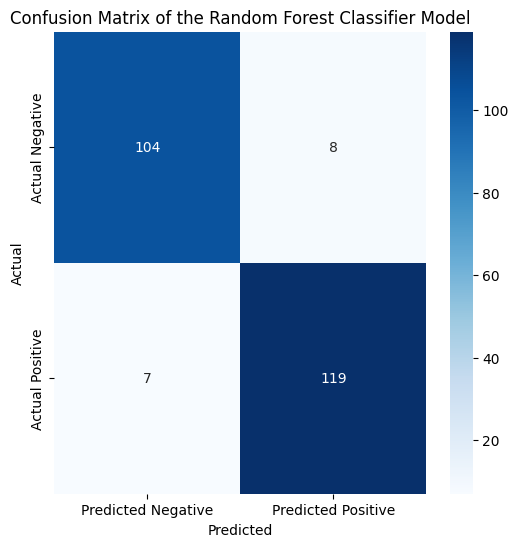

Confusion Matrix:
[[104   8]
 [  7 119]]


In [265]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optionally, plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Random Forest Classifier Model')
plt.show()

# You can print it to see the matrix in text form
print("Confusion Matrix:")
print(cm)


In [266]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV

# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

In [ ]:
# Evaluating on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy after tuning: {accuracy_rf:.4f}")

In [ ]:
best_rf = grid_search.best_estimator_
print(classification_report(y_test, y_pred_rf))

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [ ]:
best_model 

In [127]:
# Get summary statistics of the dataset
print(heart_disease_dataset.describe())


               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

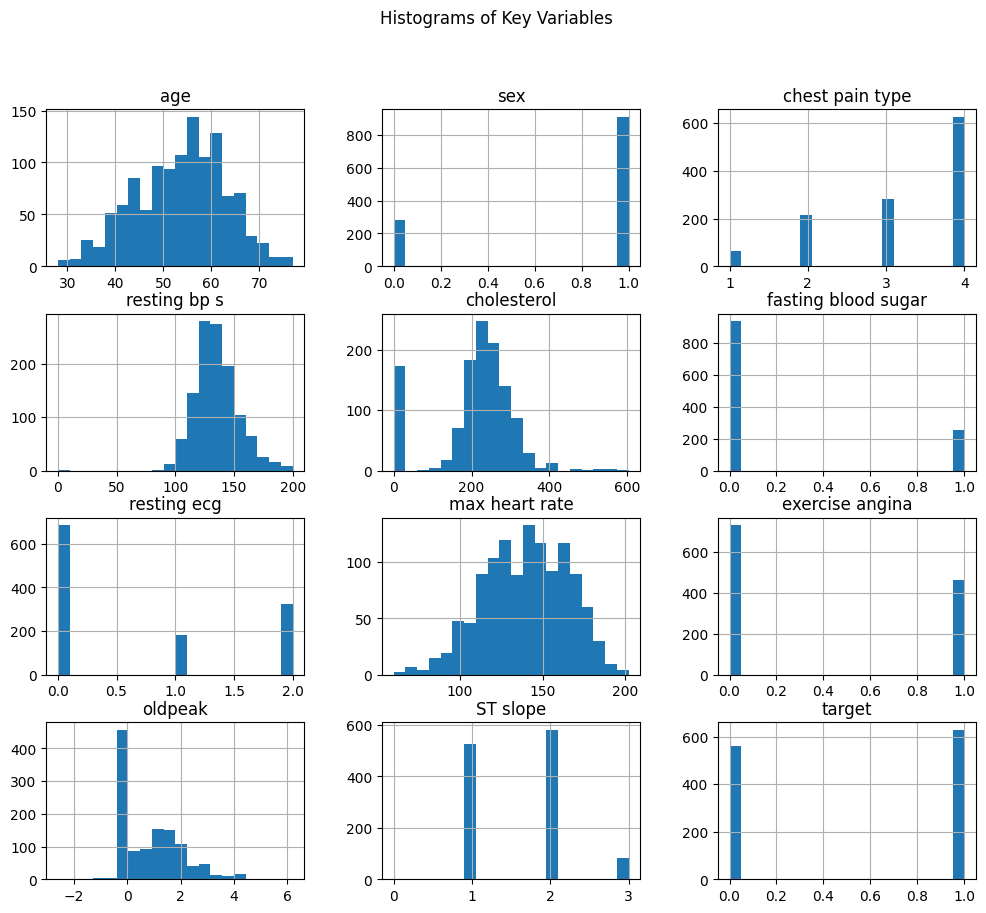

In [128]:
# Create histograms for the numeric variables
heart_disease_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Key Variables")
plt.show()


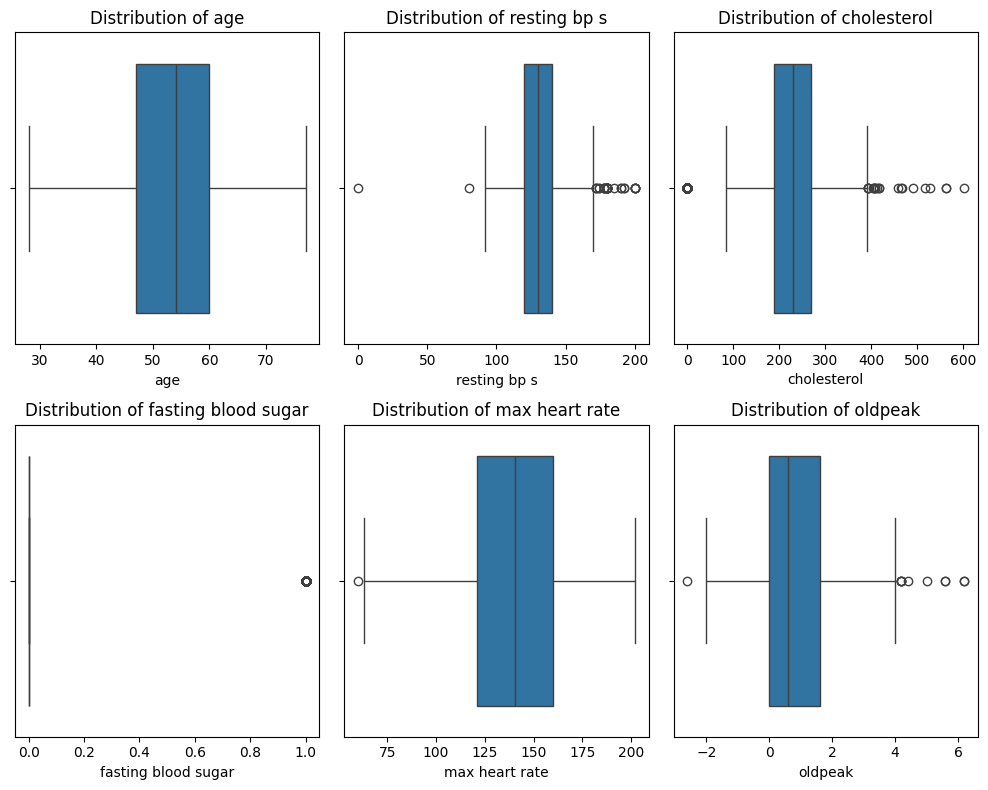

In [129]:
# Visualizing the distribution of each numeric variable with boxplots
numeric_cols = ['age', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'oldpeak']
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=heart_disease_dataset[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [130]:
from scipy import stats

# Z-score method to identify outliers
z_scores = stats.zscore(heart_disease_dataset[numeric_cols])
outliers = (z_scores > 3).sum(axis=0)
print(f'Number of outliers per column: {outliers}')


Number of outliers per column: age                     0
resting bp s            9
cholesterol             5
fasting blood sugar     0
max heart rate          0
oldpeak                10
dtype: int64


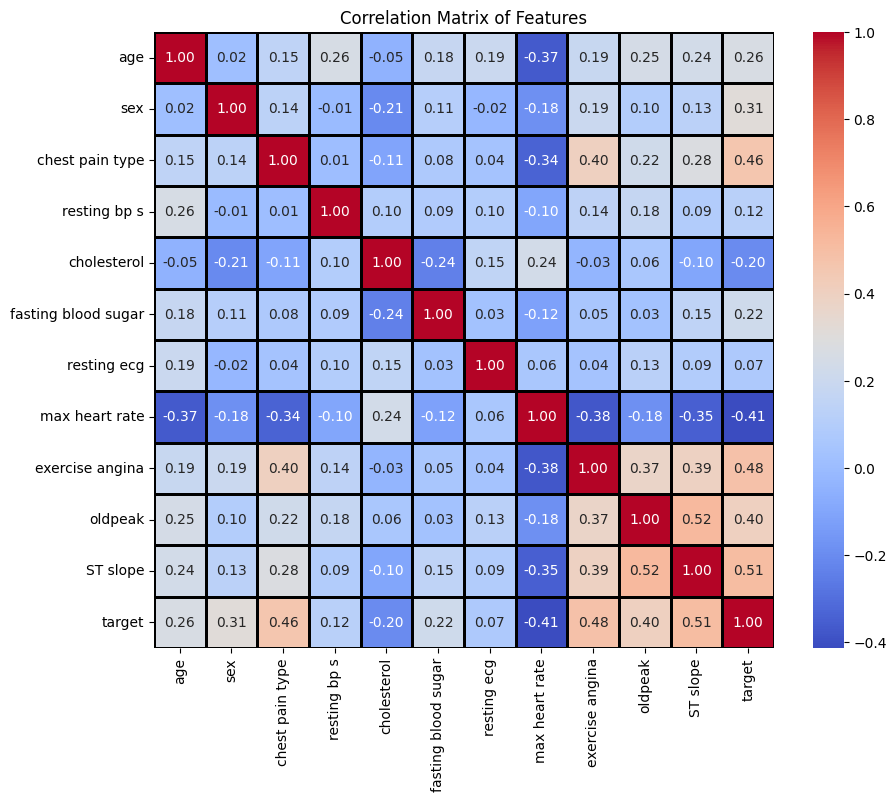

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64


In [131]:
# Correlation matrix
corr_matrix = heart_disease_dataset.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=1, linecolor='black')
plt.title("Correlation Matrix of Features")
plt.show()

# Correlation with the target variable
print(corr_matrix['target'].sort_values(ascending=False))


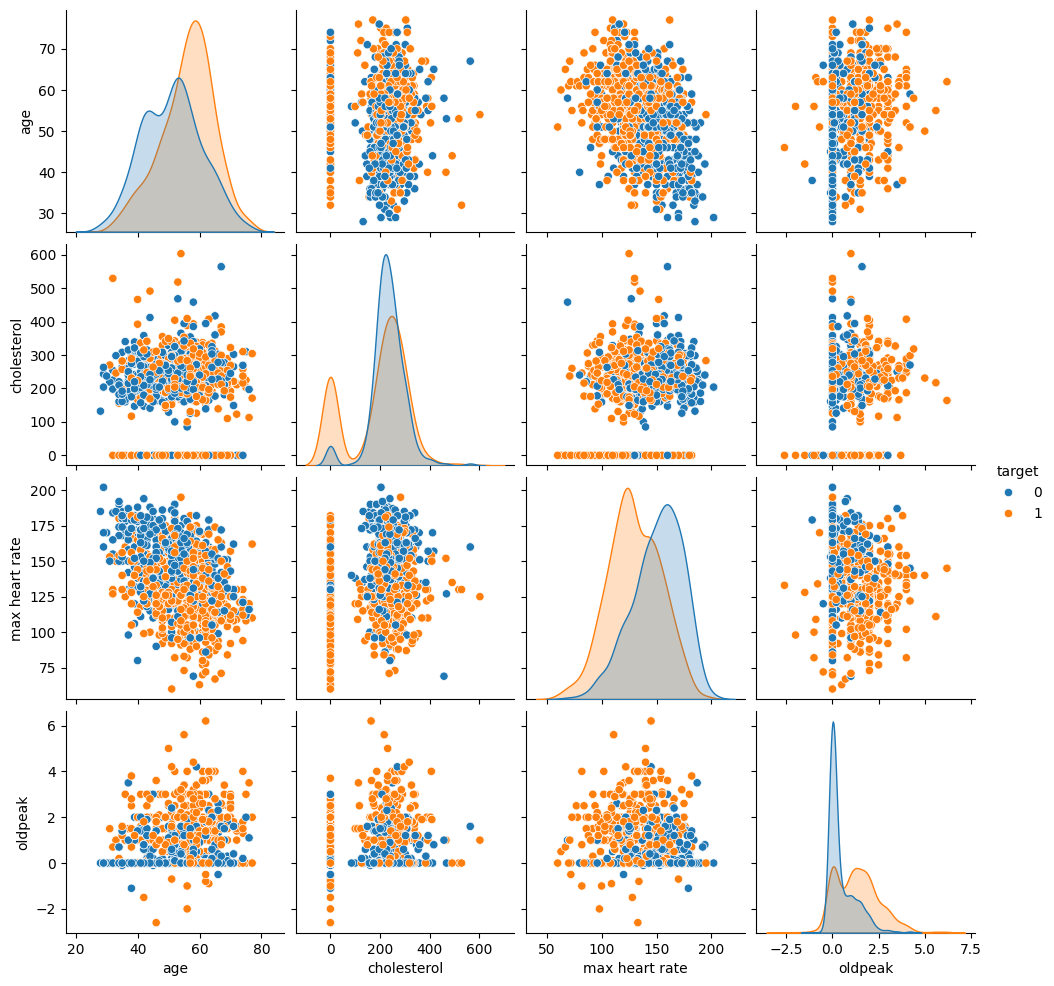

In [132]:
# Pairplot to visualize relationships between features
sns.pairplot(heart_disease_dataset[['age', 'cholesterol', 'max heart rate', 'oldpeak', 'target']], hue='target')
plt.show()


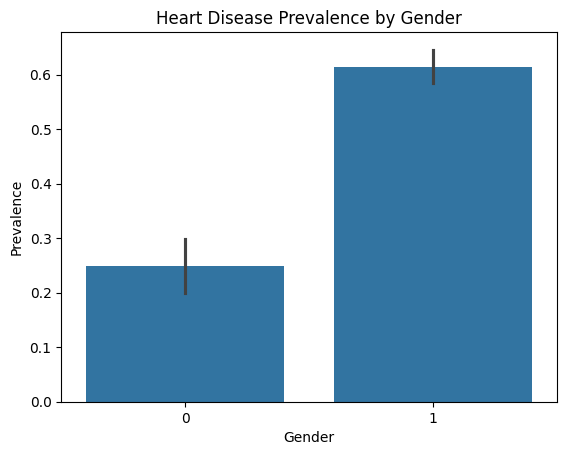

In [133]:
# Heart disease prevalence by gender
sns.barplot(x='sex', y='target', data=heart_disease_dataset)
plt.title("Heart Disease Prevalence by Gender")
plt.xlabel('Gender')
plt.ylabel('Prevalence')
plt.show()


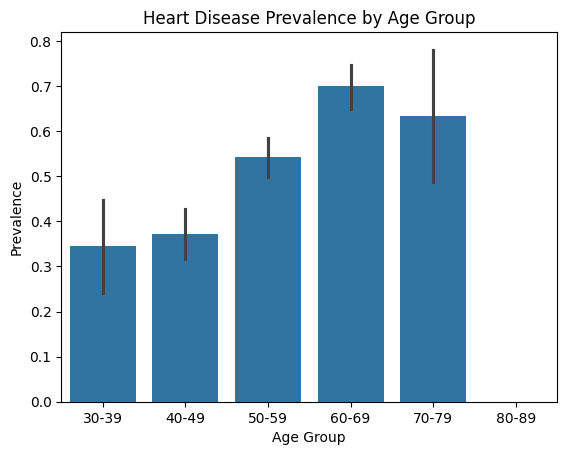

In [72]:
# Heart disease prevalence by age group
age_bins = [29, 39, 49, 59, 69, 79, 89]
heart_disease_dataset['age_group'] = pd.cut(heart_disease_dataset['age'], bins=age_bins, labels=['30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
sns.barplot(x='age_group', y='target', data=heart_disease_dataset)
plt.title("Heart Disease Prevalence by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Prevalence')
plt.show()

### Saving the Trained Model

In [73]:
# import pickle

In [74]:
# filename = 'models/heart_disease_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [75]:
# # Loading the saved model
# loaded_model = pickle.load(open('models/heart_disease_model.sav', 'rb'))

In [76]:
# input_data = (64,1,4,128,263,0,0,105,1,0.2,2)
# input_data_as_numpy_array = np.asarray(input_data)
# reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)

# prediction = loaded_model.predict(reshaped_input_data)

# print(prediction)

# if (prediction[0] == 0):
#     print('The person does not have a heart disease')
# else:
#     print('The person has heart disease')

In [77]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import shap
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('datasets/heart_disease.csv')

# Feature Engineering
df['cholesterol_age_ratio'] = df['cholesterol'] / df['age']
df['heart_rate_deviation'] = 220 - df['age'] - df['max heart rate']
df['bp_category'] = pd.cut(df['resting bp s'], bins=[0, 119, 139, np.inf], labels=["Low", "Normal", "High"], right=False)
df = pd.get_dummies(df, columns=['bp_category'])  # One-hot encode the categorical feature

# Define Features and Target
X = df.drop(columns=['target'])
y = df['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Train RandomForest Model
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=7, min_samples_leaf=2, max_features="sqrt", random_state=2)
rf.fit(X_train, y_train)

# Feature Selection using RFE
selector = RFE(rf, n_features_to_select=10)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

# SHAP for Feature Importance
# explainer = shap.Explainer(rf, X_train)
# shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train)


Selected Features: Index(['age', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope',
       'cholesterol_age_ratio', 'heart_rate_deviation'],
      dtype='object')


In [78]:
y_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
training_data_accuracy

0.9351740696278511

In [79]:
y_train_prediction = selector.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
training_data_accuracy

0.9411764705882353

In [80]:
# Accuracy score on the test data
y_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
test_data_accuracy

0.8935574229691877

In [81]:
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       168
           1       0.90      0.90      0.90       189

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357



In [82]:
# Accuracy score on the test data
y_test_prediction = selector.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
test_data_accuracy

0.896358543417367

In [83]:
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       168
           1       0.90      0.90      0.90       189

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



In [84]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you already have a trained model and test data
# # model: your trained classifier (e.g., RandomForestClassifier)
# # X_test, y_test: your test features and target values

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Get the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Optionally, plot the confusion matrix using Seaborn
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # You can print it to see the matrix in text form
# print("Confusion Matrix:")
# print(cm)




In [85]:
from ydata_profiling import ProfileReport

ProfileReport(heart_disease_dataset, title='Heart Disease Dataset Profiling Report', explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [134]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.87815126 0.88235294 0.95798319 0.94117647 0.96638655]


In [135]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


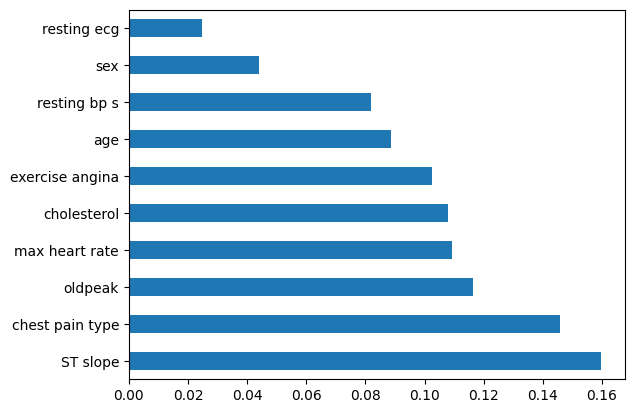

In [137]:
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [476, 238]